In [1]:
import os

import numpy as np
import pandas as pd
import cv2

from matplotlib import pyplot as plt

In [2]:
_image_dir = '../datasets/celeba/img_align_celeba_png/'

In [10]:
img_df = pd.read_csv('../datasets/celeba/attributes/attr_celeba.csv').replace({-1:0})[['filename', 'Eyeglasses', 'Smiling', 'Male', 'No_Beard', 'Young']]

In [11]:
img_df.head()

,filename,Eyeglasses,Smiling,Male,No_Beard,Young
0,000001.png,0,1,0,1,1
1,000002.png,0,1,0,1,1
2,000003.png,0,0,1,1,1
3,000004.png,0,0,0,1,1
4,000005.png,0,0,0,1,1


In [34]:
eyeglasses_df = img_df.loc[(img_df['Male'] == 1) & (img_df['Smiling'] == 0) & (img_df['Young'] == 0)]
eyeglasses_df

,filename,Eyeglasses,Smiling,Male,No_Beard,Young
14,000015.png,0,0,1,1,0
29,000030.png,0,0,1,1,0
31,000032.png,0,0,1,1,0
48,000049.png,0,0,1,0,0
50,000051.png,0,0,1,0,0
...,...,...,...,...,...,...
202554,202555.png,0,0,1,1,0
202564,202565.png,0,0,1,1,0
202567,202568.png,1,0,1,1,0
202585,202586.png,0,0,1,1,0


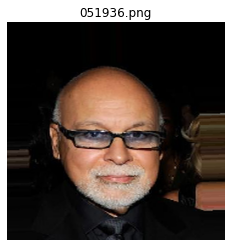

In [35]:
np.random.seed(10)
for filename in np.random.choice(eyeglasses_df['filename'], 1, replace=False):
    img = cv2.imread(os.path.join(_image_dir, filename))
    img = cv2.resize(img, (256,256), interpolation=cv2.INTER_LANCZOS4)
    cv2.imwrite('256-dataset-' + filename, img)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title(filename)
    plt.imshow(img)
    plt.axis("off")
    plt.show()